In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from scipy import stats
from sklearn import preprocessing

# Импортируем датасет "нечестного" казино

In [2]:
df_casino = pd.read_csv("onlineCasino.csv")
df_casino.head()

,ID,gamers,skins,money,ticks,peopleWin,peopleLost,outpay,time,moderator
0,2091103,144,174,283.57,14.30,125.459984,0.25,408.780000,2021-08-25 16:43,False
1,2091104,134,182,279.30,1.14,5.810003,177.04,108.070010,2021-08-25 16:44,False
2,2091105,139,179,282.87,3.91,125.010000,5.96,401.919920,2021-08-25 16:44,False
3,2091106,139,169,271.44,1.15,6.900001,181.85,96.490005,2021-08-25 16:45,False
4,2091107,142,177,304.88,1.00,0.000000,304.88,0.000000,2021-08-25 16:45,False


In [3]:
df_casino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55575 entries, 0 to 55574
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          55575 non-null  int64  
 1   gamers      55575 non-null  int64  
 2   skins       55575 non-null  int64  
 3   money       55575 non-null  float64
 4   ticks       55575 non-null  float64
 5   peopleWin   55575 non-null  float64
 6   peopleLost  55575 non-null  float64
 7   outpay      55575 non-null  float64
 8   time        55565 non-null  object 
 9   moderator   55575 non-null  bool   
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 3.9+ MB


# Удаляем строчки, в которых не указано время, их мало, так что не боимся ими перебрегать

In [4]:
idx_to_drop = df_casino[df_casino["time"].isna()].index
print(df_casino.shape[0])
df_casino = df_casino.drop(idx_to_drop, axis=0)
df_casino.shape[0]

55575


55565

In [5]:
print(f'Average amount of the players in a single game: {df_casino["gamers"].mean()}, ' +
f'min players: {df_casino["gamers"].min()}, max players: {df_casino["gamers"].max()}')

Average amount of the players in a single game: 123.04968955277603, min players: 0, max players: 491


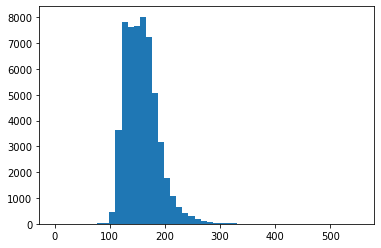

In [6]:
plt.hist(df_casino["skins"], bins=50)
None

/home/niisan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


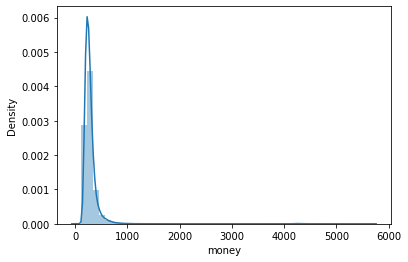

In [7]:
sns.distplot(df_casino["money"])
None

# Как мы видим, казино в плюсе почти на миллион

In [8]:
df_casino["peopleWin"].sum()

3703645.79214257

In [9]:
df_casino["peopleLost"].sum()

4407522.4382627895

In [10]:
moder_yes = df_casino[df_casino["moderator"] == True]
moder_no = df_casino[df_casino["moderator"] == False]

moder_yes["peopleLost"].mean(), moder_no["peopleLost"].mean()

(2692.8496947050353, 72.76758796771824)

In [12]:
year = []
month = []
day = []
hour = []
minute = []

for i in range(df_casino.shape[0]):
    s = datetime.strptime(df_casino["time"].iloc[i], "%Y-%m-%d %H:%M")
    year.append(s.year)
    month.append(s.month)
    day.append(s.day)
    hour.append(s.hour)
    minute.append(s.minute)

df_casino["year"] = year
df_casino["month"] = month
df_casino["day"] = day
df_casino["hour"] = hour
df_casino["minute"] = minute

In [13]:
df_casino.head()

,ID,gamers,skins,money,ticks,peopleWin,peopleLost,outpay,time,moderator,year,month,day,hour,minute
0,2091103,144,174,283.57,14.30,125.459984,0.25,408.780000,2021-08-25 16:43,False,2021,8,25,16,43
1,2091104,134,182,279.30,1.14,5.810003,177.04,108.070010,2021-08-25 16:44,False,2021,8,25,16,44
2,2091105,139,179,282.87,3.91,125.010000,5.96,401.919920,2021-08-25 16:44,False,2021,8,25,16,44
3,2091106,139,169,271.44,1.15,6.900001,181.85,96.490005,2021-08-25 16:45,False,2021,8,25,16,45
4,2091107,142,177,304.88,1.00,0.000000,304.88,0.000000,2021-08-25 16:45,False,2021,8,25,16,45


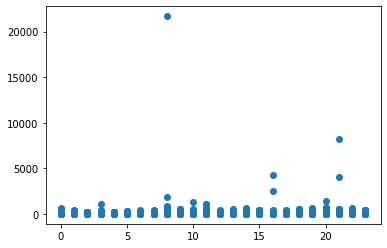

In [14]:
plt.scatter(df_casino["hour"], df_casino["peopleWin"])
None

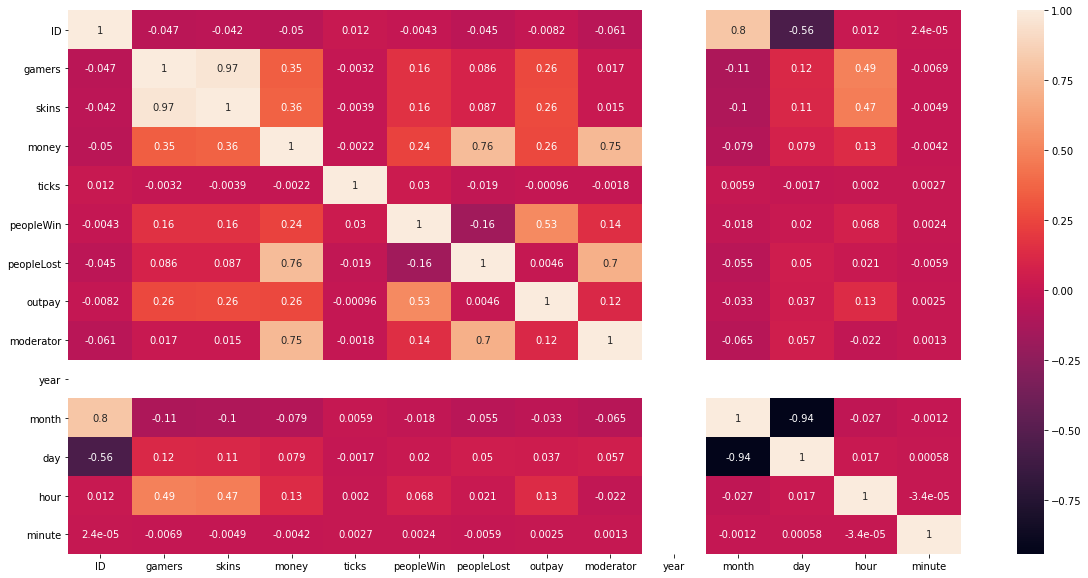

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df_casino.corr(), annot=True)
None

# Гипотеза: в среднем люди проигрывают и выигрывают одинаковое количество денег

In [72]:
lost = df_casino["peopleLost"]
won = df_casino["peopleWin"]

stats.ttest_ind(lost.sample(3000), won.sample(3000))

Ttest_indResult(statistic=3.9120748967325305, pvalue=9.251801108115039e-05)

p-value < 0.05, значит мы отвергаем гипотезу

# Гипотеза: в среднем до полудня и после теряют одинаковое количество денег

In [75]:
am = df_casino[df_casino["hour"] <= 12]["peopleLost"]
pm = df_casino[df_casino["hour"] > 12]["peopleLost"]

stats.ttest_rel(am.sample(3000), pm.sample(3000))

Ttest_relResult(statistic=1.0791366400565654, pvalue=0.2806136019644352)

p-value > 0.05, значит мы не отвергаем гипотезу

# Гипотеза: с модератором и без люди теряют одинаковое количество денег

In [78]:
moder_yes = df_casino[df_casino["moderator"] == True]["peopleLost"]
moder_no = df_casino[df_casino["moderator"] == False]["peopleLost"]

stats.ttest_rel(moder_yes, moder_no.sample(moder_yes.shape[0]))

Ttest_relResult(statistic=16.802132487605586, pvalue=3.4782397020144964e-35)

p-value < 0.05, значит мы отвергаем гипотезу

# Гипотеза: в августе и сентябре ставили одинаковое количество скинов

In [84]:
aug = df_casino[df_casino["month"] == 8]["skins"]
sept = df_casino[df_casino["month"] == 9]["skins"]

stats.ttest_rel(aug.sample(3000), sept.sample(3000))

Ttest_relResult(statistic=8.212351853230858, pvalue=3.186361265997146e-16)

p-value < 0.05, значит мы отвергаем гипотезу

In [83]:
sept.mean()

156.19483309752135